In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
import numpy as np
import my_functions as my
import gsw
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import pandas as pd
import glidertools as gt
from sklearn.linear_model import LinearRegression
import math

import my_plot_params

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=1)  # every month
week = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
weeks = mdates.WeekdayLocator(byweekday=mdates.MO, interval=3)

yearsFmt = mdates.DateFormatter("%d/%m")

mnthFmt = mdates.DateFormatter("%B")

lightblue = '#5499c7'
blue      = '#21618c'
orange    = '#f39c12'
green     = '#27ae60'
red       = '#cb4335'

/Users/marcel/opt/anaconda3/envs/duplessis2021_JGR/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
def rolling_mean(dat, window=4):
    dat_new = gt.cleaning.rolling_window(dat, func=np.mean, window=window)
    return dat_new

In [3]:
# note these are the 6H time series
dat_saz = xr.open_dataset('../data/dat_saz_6h.nc')
dat_pfz = xr.open_dataset('../data/dat_pfz_6h.nc')
dat_miz = xr.open_dataset('../data/dat_miz_6h.nc')

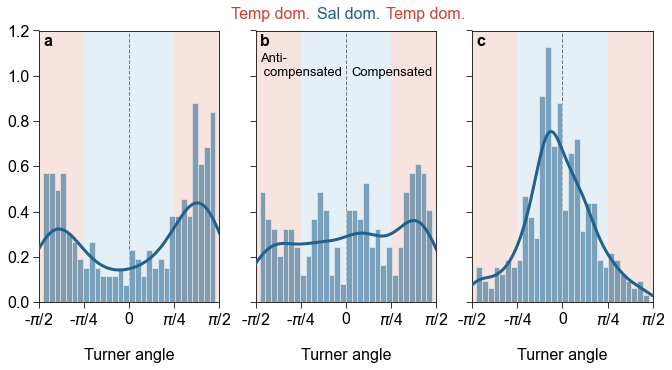

In [4]:
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=[11, 5], sharey=True)

for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):

    window=40
    
    ml_t_roll = rolling_mean(dat.ml_t_smooth, window=window)[window:-window]
    ml_s_roll = rolling_mean(dat.ml_s_smooth, window=window)[window:-window]

    T_anom = rolling_mean(dat.ml_t_smooth, 4)-ml_t_roll
    S_anom = rolling_mean(dat.ml_s_smooth, 4)-ml_s_roll
    
    alpha = gsw.alpha(rolling_mean(dat.ml_s_smooth, 4), rolling_mean(dat.ml_t_smooth, 4), 0)
    beta  = gsw.beta (rolling_mean(dat.ml_s_smooth, 4), rolling_mean(dat.ml_t_smooth, 4), 0)
    
    dT = T_anom.diff(dim='time')*alpha
    dS = S_anom.diff(dim='time')*beta
    
    R = dT/dS
    
    Tu = [math.atan(r) for r in R]
    
    Tu = np.array(Tu)
    
#    Tu, R, p = gsw.Turner_Rsubrho(dS, dT, p=0, axis=0)
    
# #     ax[i].hist(R, bins=np.arange(-7, 7.2, 0.5), facecolor=blue, zorder=10, alpha=0.6, edgecolor='0.95')
    ax[i].hist(Tu, bins=np.arange(-1.5, 1.6, 0.1), facecolor=blue, zorder=10, alpha=0.55, edgecolor='0.95', density=True)
    ax[i].set_xlim(-math.pi/2, math.pi/2)
    
    ax[i].xaxis.set_ticks([-math.pi/2, -math.pi/4, 0, math.pi/4, math.pi/2])
    ax[i].xaxis.set_ticklabels(['-$\pi$/2', '-$\pi$/4', 0, '$\pi$/4', '$\pi$/2'])
#     ax[i].grid(axis='x', zorder=0, c='0.25', ls='-')
    ax[i].plot([0,0],[0, 1.2], c='k', lw=1, alpha=0.5, ls='--')
    ax[i].set_ylim(0, 1.2)
    
    ax[i].fill_between(x=[-math.pi/2, -math.pi/4], y1=0, y2=1.2, facecolor=red, alpha=0.15)
    ax[i].fill_between(x=[ math.pi/2,  math.pi/4], y1=0, y2=1.2, facecolor=red, alpha=0.15)
    ax[i].fill_between(x=[-math.pi/4,  math.pi/4], y1=0, y2=1.2, facecolor=lightblue, alpha=0.15)
      
    sns.kdeplot(Tu, ax=ax[i], zorder=10, c=blue, lw=3)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Turner angle', labelpad=20)
    
ax[1].text(-1.5, 1.0, 'Anti- \n compensated', fontsize=13)
ax[1].text( 0.1, 1.0, 'Compensated', fontsize=13)

ax[1].text(-0.5, 1.25, 'Sal dom.',   fontsize=16, color=blue)
ax[1].text(-2, 1.25, 'Temp dom.',  fontsize=16, color=red)
ax[1].text( 0.7, 1.25, 'Temp dom.', fontsize=16, color=red)

ax[0].text(-1.5, 1.13, 'a', fontweight='bold')
ax[1].text(-1.5, 1.13, 'b', fontweight='bold')
ax[2].text(-1.5, 1.13, 'c', fontweight='bold')
    
# ax[0].set_ylabel('Probability')

plt.savefig('../figs_submission2/fig9.png', dpi=300, bbox_inches='tight')